In [1]:
#Import all necessary packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.utils
import sklearn.linear_model
import sklearn.ensemble
import sklearn.svm
import sklearn.tree
import sklearn.neighbors
import sklearn.metrics
import warnings

In [2]:
#Ignore all warnings
warnings.simplefilter("ignore")

In [3]:
#Load the dataset to dataframe
df = pd.read_csv("dataset.csv")
print(df)

        weight   age  height size
0           62  28.0  172.72   XL
1           59  36.0  167.64    L
2           61  34.0  165.10    M
3           65  27.0  175.26    L
4           62  45.0  172.72    M
...        ...   ...     ...  ...
119729      63  42.0  175.26    M
119730      45  29.0  154.94    S
119731      61  31.0  172.72    M
119732      74  31.0  167.64   XL
119733      70  30.0  167.64   XL

[119734 rows x 4 columns]


In [4]:
#Count total rows
print(df.shape[0])

#Count total columns
print(df.shape[1])

#Count the number of missing values for each column
print(df.isnull().sum())

# Remove records with any missing value
df.dropna(inplace = True)

#Reset the index
df.reset_index(drop = True, inplace = True)

#Summary statistics 
print(df.describe())

#List all the sizes' names in the dataset
size_avail = df['size'].unique().tolist()
print(size_avail)

119734
4
weight      0
age       257
height    330
size        0
dtype: int64
              weight            age         height
count  119153.000000  119153.000000  119153.000000
mean       61.756095      34.032714     165.807068
std         9.942877       8.148302       6.737797
min        22.000000       0.000000     137.160000
25%        55.000000      29.000000     160.020000
50%        61.000000      32.000000     165.100000
75%        67.000000      37.000000     170.180000
max       136.000000     117.000000     193.040000
['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL']


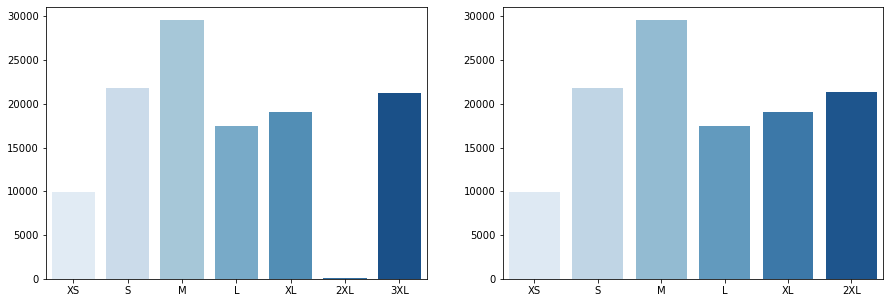

M      29575
S      21829
2XL    21328
XL     19033
L      17481
XS      9907
Name: size, dtype: int64


In [5]:
#Change XXS to 2XS, XXL to 2XL,  and XXXL to 3XL
df['size'] = df['size'].replace(['XXS'],'XS')
df['size'] = df['size'].replace(['XXL'],'2XL')
df['size'] = df['size'].replace(['XXXL'],'3XL')

figure, axes = plt.subplots(1, 2, figsize = (15, 5), sharex = False)

#Sizes' distributions
sns.countplot(data= df, x = 'size', order = ['XS', 'S', 'M', 'L', 'XL', '2XL', '3XL'], palette = "Blues", ax =axes[0]).set(xlabel= None , ylabel = None)

#Change 3XL to 2XL
df['size'].replace(to_replace = '3XL', value = '2XL', inplace = True)

#Sizes' counts after changing 3XL to 2XL (visualization)
sns.countplot(data= df, x = 'size', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], palette = "Blues", ax = axes[1]).set(xlabel= None , ylabel = None)
plt.show()

#Sizes's counts after changing 3XL to 2XL (text)
print(df['size'].value_counts())

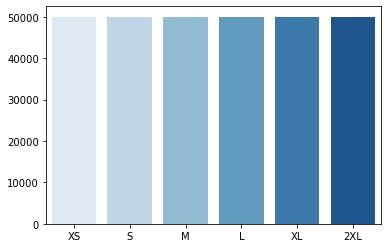

XL     50000
XS     50000
M      50000
S      50000
L      50000
2XL    50000
Name: size, dtype: int64


In [6]:
#Upsample all size so that each size's record is 50,000
df_XS_upsampled = sklearn.utils.resample(df[df['size'] == 'XS'], replace = True, n_samples = 40093, random_state =  100)
df = df.append(df_XS_upsampled, ignore_index = True)

df_S_upsampled = sklearn.utils.resample(df[df['size'] == 'S'], replace = True, n_samples = 28171, random_state =  100)
df = df.append(df_S_upsampled, ignore_index = True)

df_M_upsampled = sklearn.utils.resample(df[df['size'] == 'M'], replace = True, n_samples = 20425, random_state =  100)
df = df.append(df_M_upsampled, ignore_index = True)

df_L_upsampled = sklearn.utils.resample(df[df['size'] == 'L'], replace = True, n_samples = 32519, random_state =  100)
df = df.append(df_L_upsampled, ignore_index = True)

df_XL_upsampled = sklearn.utils.resample(df[df['size'] == 'XL'], replace = True, n_samples = 30967, random_state =  100)
df = df.append(df_XL_upsampled, ignore_index = True)

df_2XL_upsampled = sklearn.utils.resample(df[df['size'] == '2XL'], replace = True, n_samples = 28672, random_state =  100)
df = df.append(df_2XL_upsampled, ignore_index = True)


#Size's distribution after resampling (visualization)
sns.countplot(data= df, x = 'size', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], palette = "Blues").set(xlabel= None , ylabel = None)
plt.show()

#Size's distribution after resampling (text)
print(df['size'].value_counts())

In [7]:
#Feature engineer
df['bmi'] = df['weight']/((df['height']/100)**2)
print(df)

        weight   age  height size        bmi
0           62  28.0  172.72   XL  20.782914
1           59  36.0  167.64    L  20.994073
2           61  34.0  165.10    M  22.378743
3           65  27.0  175.26    L  21.161563
4           62  45.0  172.72    M  20.782914
...        ...   ...     ...  ...        ...
299995      74  37.0  175.26  2XL  24.091626
299996      74  31.0  180.34  2XL  22.753467
299997      54  32.0  170.18  2XL  18.645615
299998     102  38.0  175.26  2XL  33.207376
299999      65  32.0  160.02  2XL  25.384279

[300000 rows x 5 columns]


Text(0, 0.5, '')

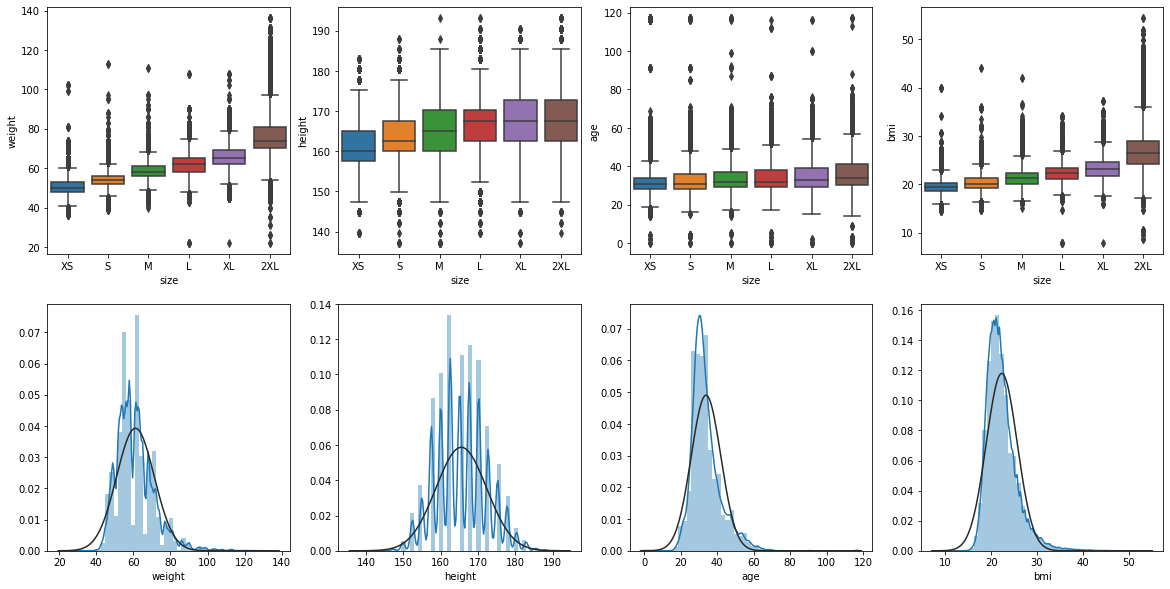

In [8]:
#Draw a boxplot for each size by features
figure, axes = plt.subplots(2, 4, figsize = (20, 10), sharex = False)
sns.boxplot(data = df, x = "size", y = "weight", order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes[0,0])
sns.boxplot(data = df, x = "size", y = "height", order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes [0,1])
sns.boxplot(data = df, x = "size", y = "age", order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes[0,2])
sns.boxplot(data = df, x = "size", y = "bmi", order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes[0,3])

#Draw a density curve for each size by features
sns.distplot(df['weight'], fit = sp.stats.norm, ax = axes[1,0]).set_ylabel('')
sns.distplot(df['height'], fit = sp.stats.norm, ax = axes[1,1]).set_ylabel('')
sns.distplot(df['age'], fit = sp.stats.norm, ax = axes[1,2]).set_ylabel('')
sns.distplot(df['bmi'], fit = sp.stats.norm, ax = axes[1,3]).set_ylabel('')

# figure.savefig('{}.jpg'.format('bxndstplt'))

In [9]:
#Remove outliers:
df_copy = df.copy()

df_XS = df_copy.copy()
df_S = df_copy.copy()
df_M = df_copy.copy()
df_L = df_copy.copy()
df_XL = df_copy.copy()
df_2XL = df_copy.copy()


df_XS = df_XS[df_XS['size'] == 'XS']
df_XS.drop('size', axis = 1, inplace = True)

df_S = df_S[df_S['size'] == 'S']
df_S.drop('size', axis = 1, inplace = True)

df_M = df_M[df_M['size'] == 'M']
df_M.drop('size', axis = 1, inplace = True)

df_L = df_L[df_L['size'] == 'L']
df_L.drop('size', axis = 1, inplace = True)

df_XL = df_XL[df_XL['size'] == 'XL']
df_XL.drop('size', axis = 1, inplace = True)

df_2XL = df_2XL[df_2XL['size'] == '2XL']
df_2XL.drop('size', axis = 1, inplace = True)



filtered_entries_XS = (np.abs(sp.stats.zscore(df_XS)) < 3).all(axis=1)
new_df_XS = df_XS[filtered_entries_XS]

filtered_entries_S = (np.abs(sp.stats.zscore(df_S)) < 3).all(axis=1)
new_df_S = df_S[filtered_entries_S]
 
filtered_entries_M = (np.abs(sp.stats.zscore(df_M)) < 3).all(axis=1)
new_df_M = df_M[filtered_entries_M]

filtered_entries_L = (np.abs(sp.stats.zscore(df_L)) < 3).all(axis=1)
new_df_L = df_L[filtered_entries_L]

filtered_entries_XL = (np.abs(sp.stats.zscore(df_XL)) < 3).all(axis=1)
new_df_XL = df_XL[filtered_entries_XL]

filtered_entries_2XL = (np.abs(sp.stats.zscore(df_2XL)) < 3).all(axis=1)
new_df_2XL = df_2XL[filtered_entries_2XL]

dataframe_XS = df_copy.copy()
dataframe_XS = dataframe_XS.iloc[new_df_XS.index]

dataframe_S = df_copy.copy()
dataframe_S = dataframe_S.iloc[new_df_S.index]

dataframe_M = df_copy.copy()
dataframe_M = dataframe_M.iloc[new_df_M.index]

dataframe_L = df_copy.copy()
dataframe_L = dataframe_L.iloc[new_df_L.index]

dataframe_XL = df_copy.copy()
dataframe_XL = dataframe_XL.iloc[new_df_XL.index]

dataframe_2XL = df_copy.copy()
dataframe_2XL = dataframe_2XL.iloc[new_df_2XL.index]

new_df = dataframe_XS.append(dataframe_S)
new_df = new_df.append(dataframe_M)
new_df = new_df.append(dataframe_L)
new_df = new_df.append(dataframe_XL)
new_df = new_df.append(dataframe_2XL)

new_df.reset_index(drop=True, inplace=True)
#cleaned dataset is named new_df

XL     48921
XS     48757
S      48728
M      48717
L      48559
2XL    48273
Name: size, dtype: int64
weight    0
age       0
height    0
size      0
bmi       0
dtype: int64
              weight            age        height            bmi
count  291955.000000  291955.000000  291955.00000  291955.000000
mean       60.881030      33.559994     165.52207      22.204485
std         9.611322       7.404393       6.71491       3.161600
min        40.000000      14.000000     144.78000      15.300765
25%        54.000000      29.000000     160.02000      19.994665
50%        60.000000      32.000000     165.10000      21.705737
75%        65.000000      37.000000     170.18000      23.822169
max       107.000000      63.000000     187.96000      38.977129


Text(0, 0.5, '')

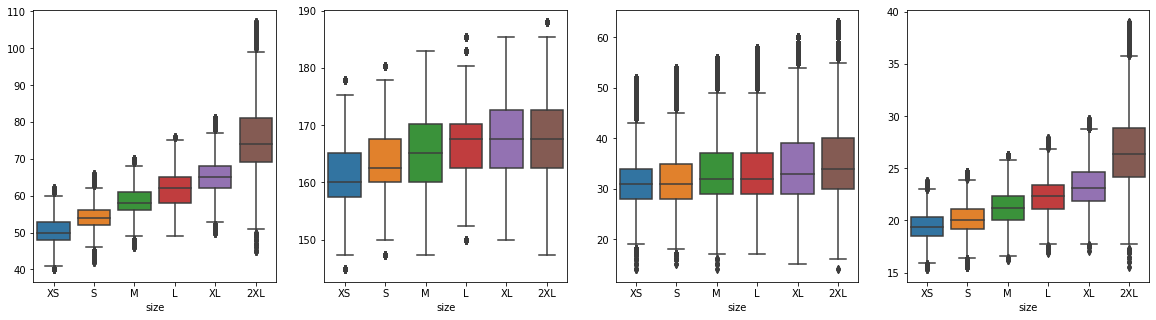

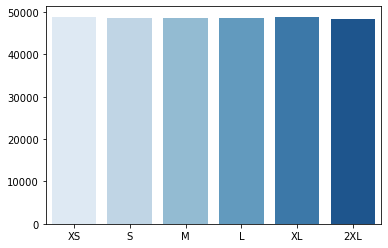

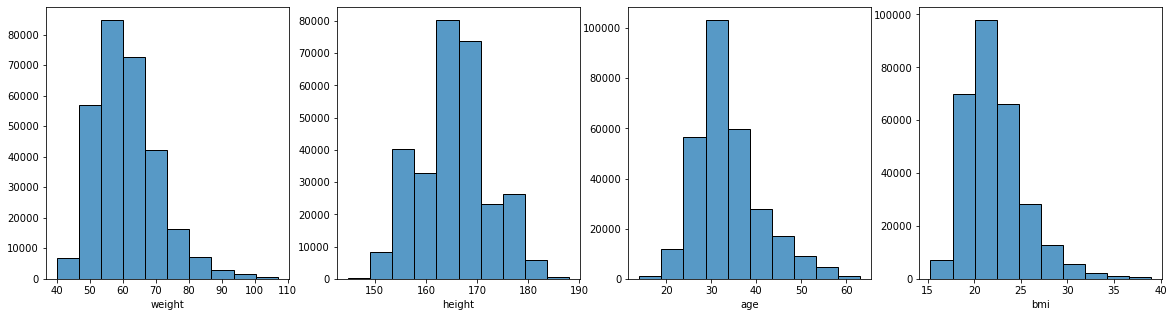

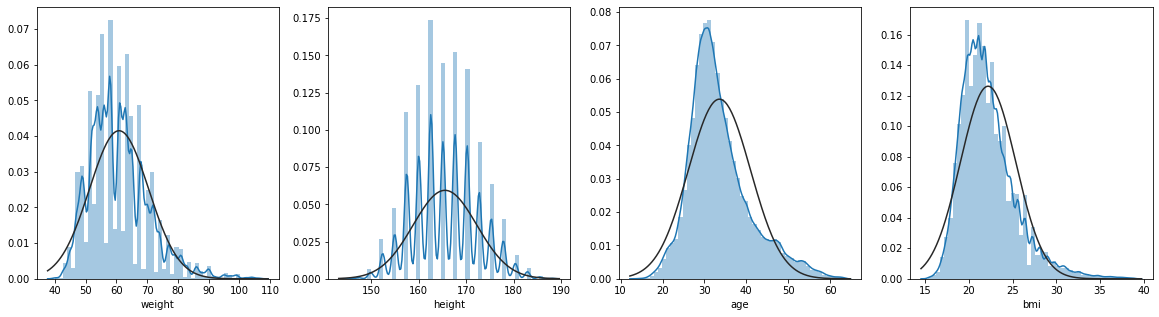

In [10]:
#CLEANED DATASET IS AVAILABLE FOR USE NOW!
#THIS PART IS USED FOR CLEANED DATASET FINAL CHECK

#Draw a boxplot for each size by weight, height, and age
figure, axes = plt.subplots(1, 4, figsize = (20, 5), sharex = False)
sns.boxplot(data = new_df, x = 'size', y = 'weight', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes[0]).set(ylabel = None)
sns.boxplot(data = new_df, x = 'size', y = 'height', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes [1]).set(ylabel = None)
sns.boxplot(data = new_df, x = 'size', y = 'age', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes[2]).set(ylabel = None)
sns.boxplot(data = new_df, x = 'size', y = 'bmi', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], ax = axes[3]).set(ylabel = None)
# figure.savefig('{}.jpg'.format('nwbxplt'))


#Sizes' distributions
figure = plt.figure()
sns.countplot(data= new_df, x = 'size', order = ['XS', 'S', 'M', 'L', 'XL', '2XL'], palette = "Blues").set(xlabel = None, ylabel = None)


#Sizes's count
print(new_df['size'].value_counts())


#Check to see if there is still any missing value
print(new_df.isnull().sum())


#Histograms
figure, axes = plt.subplots(1, 4, figsize = (20, 5), sharex = False)
sns.histplot(new_df['weight'], bins = 10, ax = axes[0]).set(ylabel = None)
sns.histplot(new_df['height'], bins = 10, ax = axes[1]).set(ylabel = None)
sns.histplot(new_df['age'], bins = 10, ax = axes[2]).set(ylabel = None) 
sns.histplot(new_df['bmi'], bins = 10, ax = axes[3]).set(ylabel = None)
# figure.savefig('{}.jpg'.format('hst'))


#Summary statisitcs for cleaned dataset
print(new_df.describe())


#Distribution plot (histogram and KDE included)
figure, axes = plt.subplots(1, 4, figsize = (20, 5), sharex = False)
sns.distplot(new_df['weight'], fit = sp.stats.norm, ax = axes[0]).set_ylabel('')
sns.distplot(new_df['height'], fit = sp.stats.norm, ax = axes[1]).set_ylabel('')
sns.distplot(new_df['age'], fit = sp.stats.norm, ax = axes[2]).set_ylabel('')
sns.distplot(new_df['bmi'], fit = sp.stats.norm, ax = axes[3]).set_ylabel('')
# figure.savefig('{}.jpg'.format('nwdistplt'))

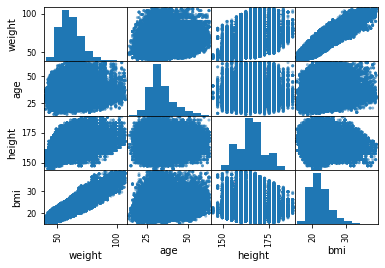

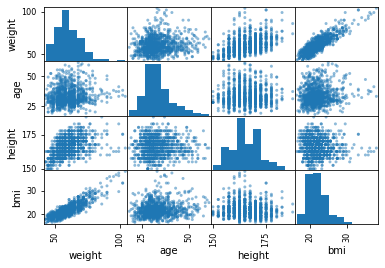

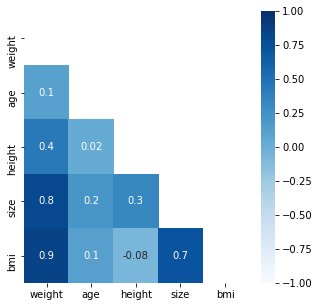

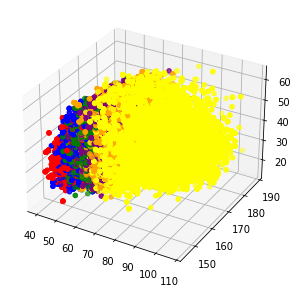

In [11]:
#(CONT.)


#Scatter matrices
#Scatter matrix for the entire cleaned dataset
pd.plotting.scatter_matrix(frame = new_df)
# #Scatter matrix for a sample of 1000 drawn from the cleaned dataset
new_df_smpl = new_df.sample(1000)
pd.plotting.scatter_matrix(frame = new_df_smpl)

# sns.pairplot(pd.concat([new_df.assign(hue ='new_df'), new_df_smpl.assign(hue='new_df_smpl')]), hue ='hue', diag_kind='kde')

# #Correlation matrix
# mask = np.triu(new_df.corr())
# sns.heatmap(new_df.corr(), vmin = -1, vmax = 1, center = 0, annot=True, fmt='.1g', cmap="Blues", mask = mask)
# plt.show()


#Label encoding
new_df['size'] = new_df['size'].map({'XS': 1, 'S': 2, 'M' : 3, 'L' : 4, 'XL' : 5, '2XL': 6})

#Correlation matrix
figure = plt.figure(figsize = (5,5))
mask = np.triu(new_df.corr())
sns.heatmap(new_df.corr(), vmin = -1, vmax = 1, center = 0, annot=  True, fmt = '.1g', cmap = "Blues", mask = mask)

#Label Decoding
new_df['size'] = new_df['size'].map({1: 'XS', 2: 'S', 3: 'M', 4: 'L', 5: 'XL', 6: '2XL'})


# # 3D scatter plot to see the distribution of each size seperately in the space
# size_name = ['XS', 'S', 'M', 'L', 'XL', 'XXL']
# color_3D = ['red', 'orange', 'brown', 'blue', 'olive', 'purple']
# size_new_df = [XS_new_df, S_new_df, M_new_df, L_new_df, XL_new_df, XXL_new_df]

# for i in range(0,6):
#     fig = plt.figure(figsize=(10,10))
#     ax = plt.axes(projection='3d')
#     ax.scatter3D(size_new_df[i]['weight'], size_new_df[i]['height'], size_new_df[i]['age'], alpha = 0.01, c = color_3D[i])
#     ax.set_title(size_name[i])
#     #fig.savefig('{}.jpg'.format(size_name[i]))
#     plt.show()

#3D scatter plot
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.scatter3D(new_df['weight'], new_df['height'], new_df['age'], c = new_df['size'].map({'XS': 'red', 'S': 'blue', 'M': 'green', 'L': 'purple', 'XL': 'orange', '2XL': 'yellow'}))
#fig.savefig('{}.jpg'.format(size_name[i]))

In [12]:
X = new_df.drop('size', axis = 1)
y = new_df['size']
X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X,y, shuffle = True)

In [13]:
#Test to see if the predictive models were trained correctly
# XS_new_df = new_df[new_df['size'] == 'XS']
# S_new_df = new_df[new_df['size'] == 'S']
# M_new_df = new_df[new_df['size'] == 'M']
# L_new_df = new_df[new_df['size'] == 'L']
# XL_new_df = new_df[new_df['size'] == 'XL']
# XXL_new_df = new_df[new_df['size'] == '2XL']

# eval_mod = XS_new_df.sample(2)
# eval_mod = eval_mod.append(S_new_df.sample(2), ignore_index = True)
# eval_mod = eval_mod.append(M_new_df.sample(2), ignore_index = True)
# eval_mod = eval_mod.append(L_new_df.sample(2), ignore_index = True)
# eval_mod = eval_mod.append(XL_new_df.sample(2), ignore_index = True)
# eval_mod = eval_mod.append(XXL_new_df.sample(2), ignore_index = True)
# eval_mod


# X2 = eval_mod.drop('size', axis=1)
# y2 = eval_mod['size']


# X2_train, X2_validation, y2_train, y2_validation = sklearn.model_selection.train_test_split(X2, y2, shuffle = True)


# models2 = {"KNN": sklearn.neighbors.KNeighborsClassifier(weights='distance'),
#          "Random Forest": sklearn.ensemble.RandomForestClassifier(),
#          "Decision Tree": sklearn.tree.DecisionTreeClassifier(),
#          "Gradient Boosting":sklearn.ensemble.GradientBoostingClassifier()
#          }

def fit_and_score(models, X_train, X_validation, y_train, y_validation):
    np.random.seed(10)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_validation, y_validation)
        print(sklearn.metrics.confusion_matrix(y_validation, model.predict(X_validation)))
        print(sklearn.metrics.classification_report(y_validation, model.predict(X_validation)))
    return model_scores
    
# model_dict = fit_and_score(models2, X2_train, X2_train, y2_train, y2_train)
# print(model_dict)

models = {"KNN": sklearn.neighbors.KNeighborsClassifier(n_neighbors = 1000, weights='distance'),
          "Decision Tree": sklearn.tree.DecisionTreeClassifier(),
          "Random Forest": sklearn.ensemble.RandomForestClassifier(),
          "Gradient Boosting":sklearn.ensemble.GradientBoostingClassifier()
         }
model_dict = fit_and_score(models, X_train, X_validation, y_train, y_validation)
print(model_dict)

[[9326  692  152   36 1895   21]
 [ 441 6375 2344  593 2348  139]
 [  66 2660 5404 2527  699  773]
 [   4  626 2298 5889  112 3257]
 [1841 3145 1054  290 5818   62]
 [   0   63  508 2577   10 8944]]
              precision    recall  f1-score   support

         2XL       0.80      0.77      0.78     12122
           L       0.47      0.52      0.49     12240
           M       0.46      0.45      0.45     12129
           S       0.49      0.48      0.49     12186
          XL       0.53      0.48      0.50     12210
          XS       0.68      0.74      0.71     12102

    accuracy                           0.57     72989
   macro avg       0.57      0.57      0.57     72989
weighted avg       0.57      0.57      0.57     72989

[[9313  694  154   36 1904   21]
 [ 446 6373 2343  592 2343  143]
 [  66 2653 5401 2539  701  769]
 [   4  627 2301 5892  113 3249]
 [1841 3149 1057  290 5811   62]
 [   0   63  513 2577   10 8939]]
              precision    recall  f1-score   support

    

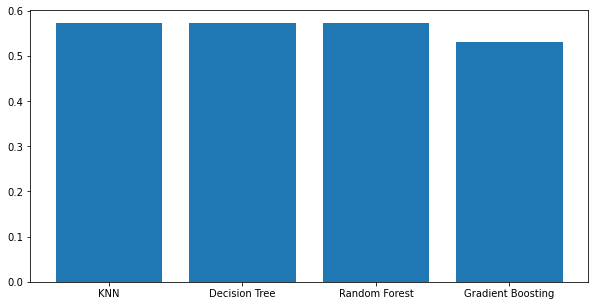

In [14]:
names = list(model_dict.keys())
values = list(model_dict.values())
fig = plt.figure(figsize = (10,5))
plt.bar(range(len(model_dict)), values, tick_label=names)
fig.savefig('{}.jpg'.format('model evaluation'))
plt.show()